In [1]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Weibull Simulation

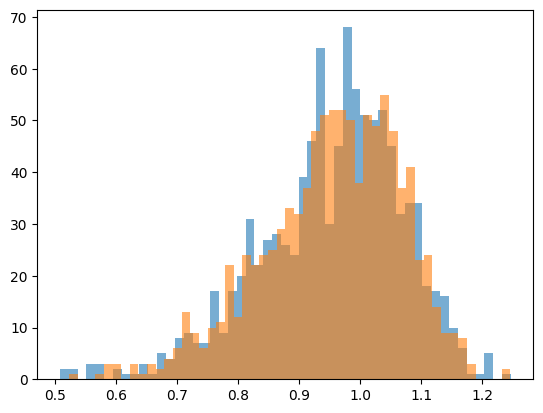

In [2]:
num_samples = 1000

x_array = np.random.weibull(10, num_samples)
y_array = np.random.weibull(10, num_samples)

plt.hist(x_array, bins=51, alpha=0.6)
plt.hist(y_array, bins=51, alpha=0.6)

plt.show()

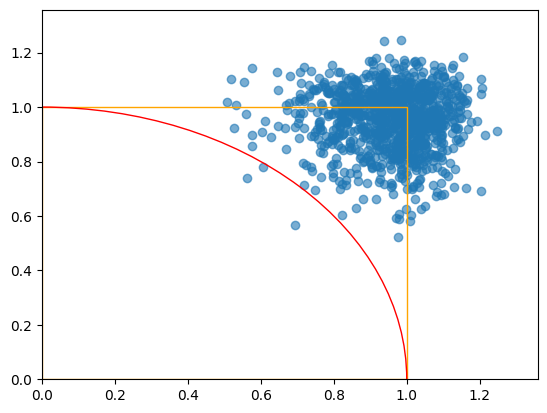

In [3]:
plt.scatter(x_array, y_array, alpha=0.6)

square = patches.Rectangle((0, 0), 1, 1, edgecolor='orange', facecolor='none')
plt.gca().add_patch(square)

square = patches.Circle((0, 0), 1, edgecolor='red', facecolor='none')
plt.gca().add_patch(square)

plt.xlim(0)
plt.ylim(0)

plt.show()

In [4]:
keep_idx = (x_array <= 1) & (y_array <= 1)

x_sq = x_array[keep_idx]
y_sq = y_array[keep_idx]

inside_idx = (x_sq - 0) ** 2 + (y_sq - 0) ** 2 <= 1**2
outside_idx = (x_sq - 0) ** 2 + (y_sq - 0) ** 2 > 1**2

pi_number_predict = 4 * np.mean(inside_idx)
print("PI number predicted", pi_number_predict)

print("Difference against PI number", pi_number_predict - np.pi)

PI number predicted 0.03225806451612903
Difference against PI number -3.109334589073664


## Loop in terms of the parameters

In [5]:
def loop_pi_estimation(a_weibull=5, num_iter=100, num_samples=100):

    x_array = np.random.weibull(a_weibull, num_samples)
    y_array = np.random.weibull(a_weibull, num_samples)
    
    result_list = []
    for _ in range(num_iter):
        
        x_new = np.random.weibull(a_weibull, num_samples)
        y_new = np.random.weibull(a_weibull, num_samples)
        
        x_array = np.append(x_array, x_new)
        y_array = np.append(y_array, y_new)

        keep_idx = (x_array <= 1) & (y_array <= 1) & (x_array >= 0) & (y_array >= 0)

        x_sq = x_array[keep_idx]
        y_sq = y_array[keep_idx]

        inside_idx = (x_sq - 0) ** 2 + (y_sq - 0) ** 2 <= 1**2
        outside_idx = (x_sq - 0) ** 2 + (y_sq - 0) ** 2 > 1**2

        pi_number_predict = 4 * np.mean(inside_idx)
        diff_pi = np.pi - pi_number_predict

        result_list.append({
            "NumberPoints": len(x_array),
            "PI_estimate": pi_number_predict,
            "Diff_real_PI": diff_pi,
            "Diff_abs_real_PI": np.abs(diff_pi)
        })

    return pd.DataFrame(result_list)

In [6]:
a_weibull_range = np.arange(0.1, 10+0.1, 0.1)

a_weibull_range = np.append(a_weibull_range, np.arange(11, 30+1))

save_result_list = []
for a_weibull in a_weibull_range:
    df_res = loop_pi_estimation(a_weibull=a_weibull, num_iter=100, num_samples=100)
    
    df_res["ShapeDist"] = a_weibull
    
    save_result_list.append(df_res)

In [7]:
close_estimations = np.argsort([np.abs(s["PI_estimate"].iloc[-1] - np.pi) for s in save_result_list])[:5]

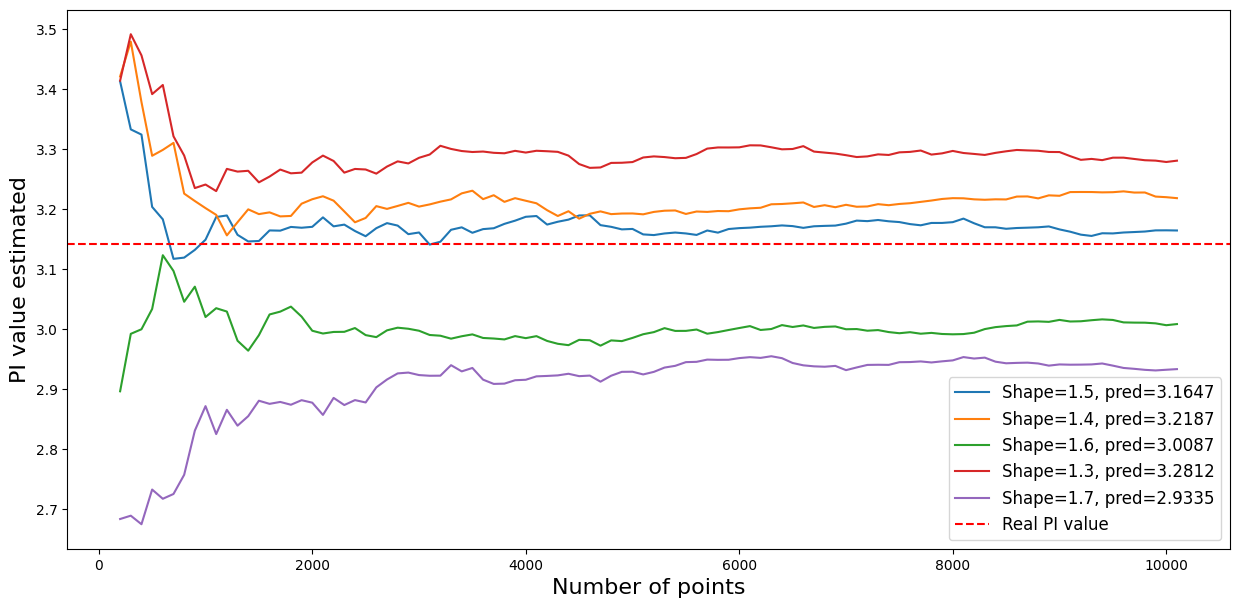

In [8]:
plt.figure(figsize=(15, 7))

for close_idx in close_estimations:
    
    shape_dist = np.round(save_result_list[close_idx]["ShapeDist"].iloc[0], 1)
    pi_estimate = np.round(save_result_list[close_idx]["PI_estimate"].iloc[-1], 4)
    label_str = "Shape=" + str(shape_dist) + ", pred=" + str(pi_estimate)
    
    plt.plot(save_result_list[close_idx]["NumberPoints"], save_result_list[close_idx]["PI_estimate"], label=label_str)

plt.axhline(np.pi, c="red", linestyle="--", label="Real PI value")

plt.ylabel("PI value estimated", fontsize=16)
plt.xlabel("Number of points", fontsize=16)
plt.legend(fontsize=12)

plt.show()

In [9]:
df_pi_last = pd.DataFrame(
    [s.iloc[-1] for s in save_result_list]
).sort_values("Diff_abs_real_PI").reset_index(drop=True)
df_pi_last.head(20)

,NumberPoints,PI_estimate,Diff_real_PI,Diff_abs_real_PI,ShapeDist
0,10100.0,3.164738,-0.023145,0.023145,1.5
1,10100.0,3.218656,-0.077063,0.077063,1.4
2,10100.0,3.008666,0.132927,0.132927,1.6
3,10100.0,3.281165,-0.139572,0.139572,1.3
4,10100.0,2.933531,0.208062,0.208062,1.7
5,10100.0,3.353545,-0.211953,0.211953,1.2
6,10100.0,3.474849,-0.333256,0.333256,1.1
7,10100.0,2.781557,0.360036,0.360036,1.8
8,10100.0,2.749751,0.391842,0.391842,1.9
9,10100.0,3.542402,-0.400810,0.400810,1.0


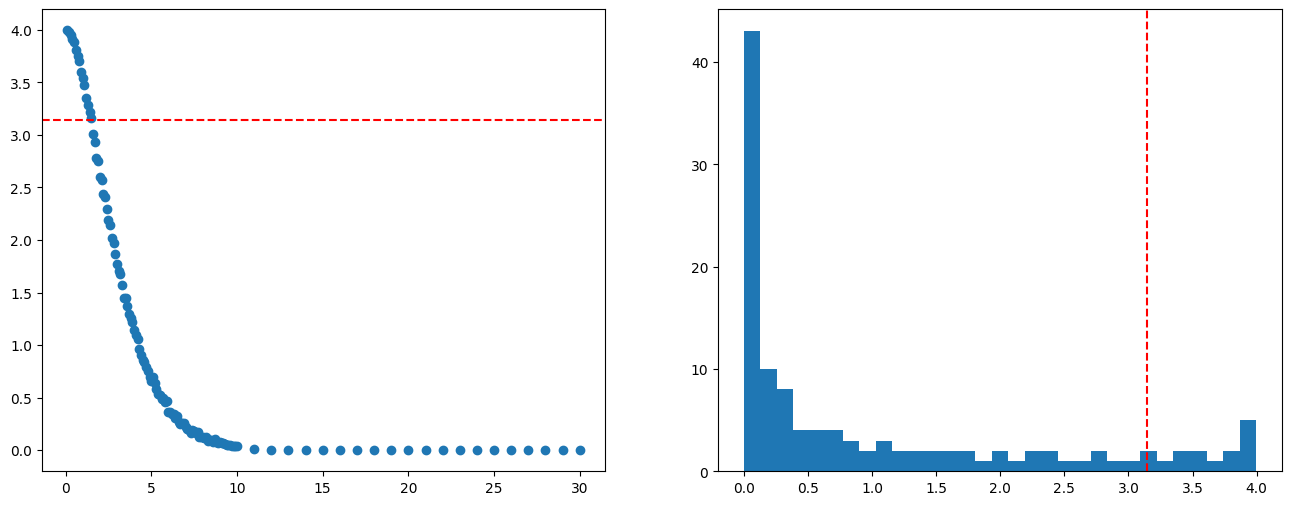

In [10]:
fig = plt.figure(figsize=(16, 6))

fig.add_subplot(1,2,1)
plt.scatter(df_pi_last["ShapeDist"], df_pi_last["PI_estimate"])

plt.axhline(np.pi, linestyle="--", c="red")

fig.add_subplot(1,2,2)
plt.hist(df_pi_last["PI_estimate"], bins=31)

plt.axvline(np.pi, linestyle="--", c="red")

plt.show()